<a href="https://colab.research.google.com/github/youngjon2001/Liver-Cancer-2/blob/main/Liver_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import the train and test dataset
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [3]:
# check the dataset of the train
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1614.0,Placebo,20567.0,F,N,N,N,N,0.7,318.0,3.37,52.0,1257.0,130.2,260.0,271.0,10.2,2.0,C
1,1,4500.0,Placebo,15031.0,F,N,N,N,N,0.6,460.0,3.06,30.0,423.0,49.6,232.0,442.0,10.0,1.0,C
2,2,2286.0,NaN,15694.0,F,NaN,NaN,NaN,N,4.6,NaN,3.62,NaN,NaN,NaN,NaN,141.0,11.0,4.0,D
3,3,2055.0,D-penicillamine,19540.0,F,N,N,N,N,0.5,226.0,3.67,22.0,622.0,58.0,85.0,176.0,9.8,3.0,C
4,4,3913.0,Placebo,20233.0,F,N,Y,N,N,0.6,347.0,4.16,81.0,1523.0,111.6,90.0,295.0,11.0,3.0,D


In [4]:
# check for column name
df_train.columns

# remove unnecessary spaces
df_train.columns = df_train.columns.str.strip()
print(df_train.columns)

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')


In [5]:
df_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,3099.0,D-penicillamine,20662.0,F,N,N,N,N,0.4,251.0,3.97,31.0,784.0,74.40,107.0,128.0,10.1,3.0
1,15001,1874.0,D-penicillamine,24257.0,M,N,Y,N,S,1.2,242.0,3.02,177.0,960.0,86.80,107.0,339.0,11.0,4.0
2,15002,1419.0,NaN,24837.0,M,NaN,NaN,NaN,N,1.3,NaN,3.65,NaN,NaN,NaN,NaN,340.0,10.0,3.0
3,15003,1847.0,Placebo,12279.0,F,N,Y,Y,N,0.7,242.0,3.35,40.0,654.0,60.45,88.0,365.0,10.6,4.0
4,15004,1677.0,D-penicillamine,19722.0,F,N,N,Y,N,1.3,288.0,3.00,32.0,7277.0,57.35,114.0,252.0,9.6,1.0


In [6]:
# remove unnecessary spaces from the test data columns
df_test.columns = df_test.columns.str.strip()
print(df_test.columns)

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')


In [7]:
# check the shape of the data of the train and test
df_train.shape
print('The train dataset has {} rows and {} columns'.format(df_train.shape[0], df_train.shape[1]))
df_test.shape
print('The test dataset has {} rows and {} columns'.format(df_test.shape[0], df_test.shape[1]))



The train dataset has 15000 rows and 20 columns
The test dataset has 10000 rows and 19 columns


In [8]:
# check for null values in test and train
print("Null values in df_train:")
print(df_train.isnull().sum())
print("\nNull values in df_test:")
print(df_test.isnull().sum())

Null values in df_train:
id                  0
N_Days              0
Drug             6477
Age                 0
Sex                 0
Ascites          6477
Hepatomegaly     6485
Spiders          6486
Edema               0
Bilirubin           0
Cholesterol      8387
Albumin             0
Copper           6572
Alk_Phos         6485
SGOT             6489
Tryglicerides    8442
Platelets         583
Prothrombin        20
Stage               0
Status              0
dtype: int64

Null values in df_test:
id                  0
N_Days              0
Drug             4357
Age                 0
Sex                 0
Ascites          4356
Hepatomegaly     4365
Spiders          4366
Edema               0
Bilirubin           0
Cholesterol      5578
Albumin             0
Copper           4429
Alk_Phos         4367
SGOT             4367
Tryglicerides    5603
Platelets         374
Prothrombin        15
Stage               0
dtype: int64


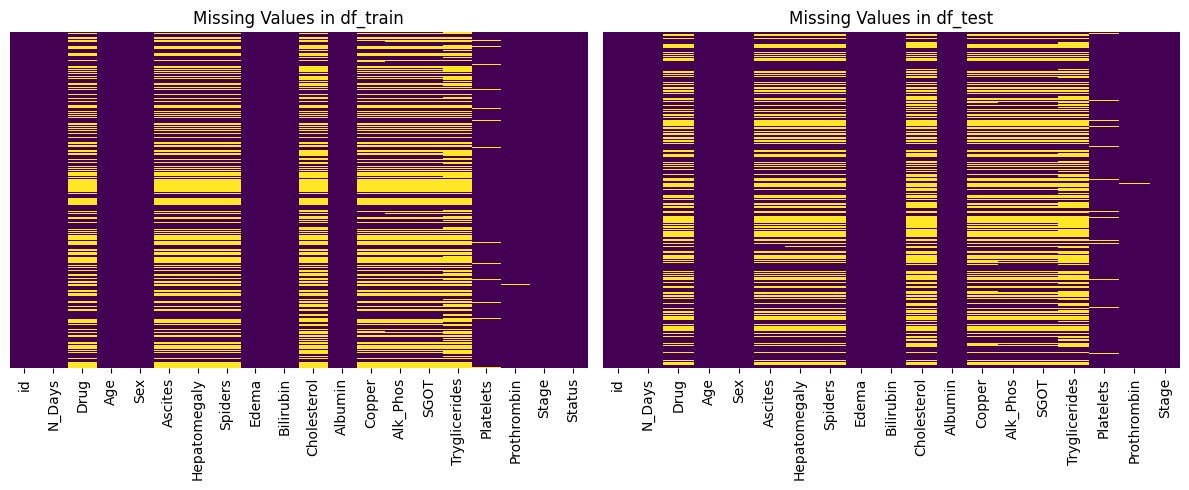

In [9]:
# missing value mapping for test and train
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.heatmap(df_train.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
plt.title('Missing Values in df_train')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.heatmap(df_test.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
plt.title('Missing Values in df_test')
plt.tight_layout()
plt.show()

The visualization above demonstrates that the missingness is systematic rather than random.

In [10]:
# Calculate missing percentages for df_train
missing_train_pct = df_train.isnull().sum() / len(df_train) * 100

# Calculate missing percentages for df_test
missing_test_pct = df_test.isnull().sum() / len(df_test) * 100

print("Missing value percentages in df_train (all columns with missing values):")
if not missing_train_pct[missing_train_pct > 0].empty:
    print(missing_train_pct[missing_train_pct > 0].sort_values(ascending=False))
else:
    print("No missing values found in df_train.")

print("\nMissing value percentages in df_test (all columns with missing values):")
if not missing_test_pct[missing_test_pct > 0].empty:
    print(missing_test_pct[missing_test_pct > 0].sort_values(ascending=False))
else:
    print("No missing values found in df_test.")

Missing value percentages in df_train (all columns with missing values):
Tryglicerides    56.280000
Cholesterol      55.913333
Copper           43.813333
SGOT             43.260000
Spiders          43.240000
Hepatomegaly     43.233333
Alk_Phos         43.233333
Ascites          43.180000
Drug             43.180000
Platelets         3.886667
Prothrombin       0.133333
dtype: float64

Missing value percentages in df_test (all columns with missing values):
Tryglicerides    56.03
Cholesterol      55.78
Copper           44.29
SGOT             43.67
Alk_Phos         43.67
Spiders          43.66
Hepatomegaly     43.65
Drug             43.57
Ascites          43.56
Platelets         3.74
Prothrombin       0.15
dtype: float64


 Although several features, particularly 'Cholesterol' and 'Tryglicerides', exhibit a high percentage of missing values (exceeding 50%), and others such as 'Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Copper', 'Alk_Phos', and 'SGOT' show significant missingness (around 43-44%), these columns will not be summarily deleted. This decision is based on the clinical context of the dataset: Some of these variables represent crucial first-line diagnostic indicators for liver cirrhosis. While TG and CHOL are not the firstline investigation to be carried out that explains why alot of value was missing.
 Their medical significance necessitates retaining them, despite the data sparsity, to ensure that potentially vital diagnostic information is not lost. Strategies for imputation will therefore be explored to handle these missing values, leveraging their clinical importance.

In [11]:
# High-missing numerical labs
high_missing_numerical = [
    'Tryglicerides',
    'Cholesterol',
    'Copper',
    'SGOT',
    'Alk_Phos'
]

# Binary clinical exam findings
binary_clinical = [
    'Spiders',
    'Hepatomegaly',
    'Ascites'
]

# Low-missing important labs
low_missing_numerical = [
    'Platelets',
    'Prothrombin'
]

In [12]:
# create a missingness indicator
for col in high_missing_numerical + binary_clinical:
    df_train[col + '_missing'] = df_train[col].isnull().astype(int)

# impute numerical variables for median
for col in high_missing_numerical + low_missing_numerical:
    df_train[col] = df_train[col].fillna(df_train[col].median())

# impute for binary_clinical columns and convert to string to ensure consistent type for OneHotEncoder
for col in binary_clinical:
    df_train[col] = df_train[col].fillna('0') # Fill with string '0' instead of int 0
    df_train[col] = df_train[col].astype(str) # Ensure entire column is string type

  # log transformation
for col in ['Tryglicerides', 'Cholesterol', 'SGOT', 'Alk_Phos']:
    df_train[col + '_log'] = np.log1p(df_train[col])

    # imputing for df_test table

# create a missingness indicator
for col in high_missing_numerical + binary_clinical:
    # Correct: Use df_test for its own missingness indicator
    df_test[col + '_missing'] = df_test[col].isnull().astype(int)

# impute numerical variables for median
for col in high_missing_numerical + low_missing_numerical:
    # Correct: Use df_test for fillna, but median from df_train to avoid data leakage
    df_test[col] = df_test[col].fillna(df_train[col].median())

# impute for binary_clinical columns in df_test and convert to string
for col in binary_clinical:
    df_test[col] = df_test[col].fillna('0') # Fill with string '0'
    df_test[col] = df_test[col].astype(str) # Ensure entire column is string type

  # log transformation
for col in ['Tryglicerides', 'Cholesterol', 'SGOT', 'Alk_Phos']:
    # Correct: Use df_test for log transformation
    df_test[col + '_log'] = np.log1p(df_test[col])

I use log transformation because it is suggest that it improve accuracy of model up to 8-12%

In [13]:
df_train.isnull().mean().sort_values(ascending=False)

df_test.isnull().mean().sort_values(ascending=False)

,0
Drug,0.4357
id,0.0000
N_Days,0.0000
Age,0.0000
Sex,0.0000
Ascites,0.0000
Hepatomegaly,0.0000
Spiders,0.0000
Edema,0.0000
Bilirubin,0.0000


i successfully inputed the values for the missing values using imputation method although drugh still has 43% of missing values. That because is a categorical variable.

In [14]:
# Impute missing values in 'Drug' column with 'Unknown'
df_train['Drug'] = df_train['Drug'].fillna('Unknown')
df_test['Drug'] = df_test['Drug'].fillna('Unknown')

print("Missing values in 'Drug' column after imputation:")
print(df_train['Drug'].isnull().sum())

Missing values in 'Drug' column after imputation:
0


Successfully computed for drug column replacing the missing with 'unknown'

In [15]:
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Copper_missing,SGOT_missing,Alk_Phos_missing,Spiders_missing,Hepatomegaly_missing,Ascites_missing,Tryglicerides_log,Cholesterol_log,SGOT_log,Alk_Phos_log
0,0,1614.0,Placebo,20567.0,F,N,N,N,N,0.7,...,0,0,0,0,0,0,5.564520,5.765191,4.876723,7.137278
1,1,4500.0,Placebo,15031.0,F,N,N,N,N,0.6,...,0,0,0,0,0,0,5.451038,6.133398,3.923952,6.049733
2,2,2286.0,Unknown,15694.0,F,0,0,0,N,4.6,...,1,1,1,1,1,1,4.605170,5.634790,4.591578,6.976348
3,3,2055.0,D-penicillamine,19540.0,F,N,N,N,N,0.5,...,0,0,0,0,0,0,4.454347,5.424950,4.077537,6.434547
4,4,3913.0,Placebo,20233.0,F,N,Y,N,N,0.6,...,0,0,0,0,0,0,4.510860,5.852202,4.723842,7.329094


In [16]:
df_train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Copper_missing,SGOT_missing,Alk_Phos_missing,Spiders_missing,Hepatomegaly_missing,Ascites_missing,Tryglicerides_log,Cholesterol_log,SGOT_log,Alk_Phos_log
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1990.722200,19277.815467,1.866580,299.068800,3.531008,64.157393,1397.528227,102.287698,103.751933,...,0.438133,0.432600,0.432333,0.432400,0.432333,0.431800,4.616116,5.666188,4.580589,7.048702
std,4330.271354,1334.913915,3913.377887,2.724007,118.495619,0.375463,54.831687,1399.488488,44.282929,32.405117,...,0.496174,0.495453,0.495417,0.495426,0.495417,0.495343,0.254732,0.241155,0.328181,0.516287
min,0.000000,41.000000,143.000000,0.300000,120.000000,1.960000,0.900000,19.000000,6.300000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.526361,4.795791,1.987874,2.995732
25%,3749.750000,1097.000000,16467.000000,0.600000,279.000000,3.290000,48.000000,979.000000,89.000000,99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.605170,5.634790,4.499810,6.887553
50%,7499.500000,1831.000000,19540.000000,0.900000,279.000000,3.580000,52.000000,1070.000000,97.650000,99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.605170,5.634790,4.591578,6.976348
75%,11249.250000,2644.000000,22347.000000,1.800000,279.000000,3.770000,58.000000,1134.000000,102.300000,99.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.605170,5.634790,4.637637,7.034388
max,14999.000000,26580.000000,189912.000000,28.000000,2880.000000,4.640000,588.000000,19120.800000,2656.000000,598.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.395262,7.965893,7.884953,9.858584


CHECKING FOR OUTLIERS USING BOX PLOT

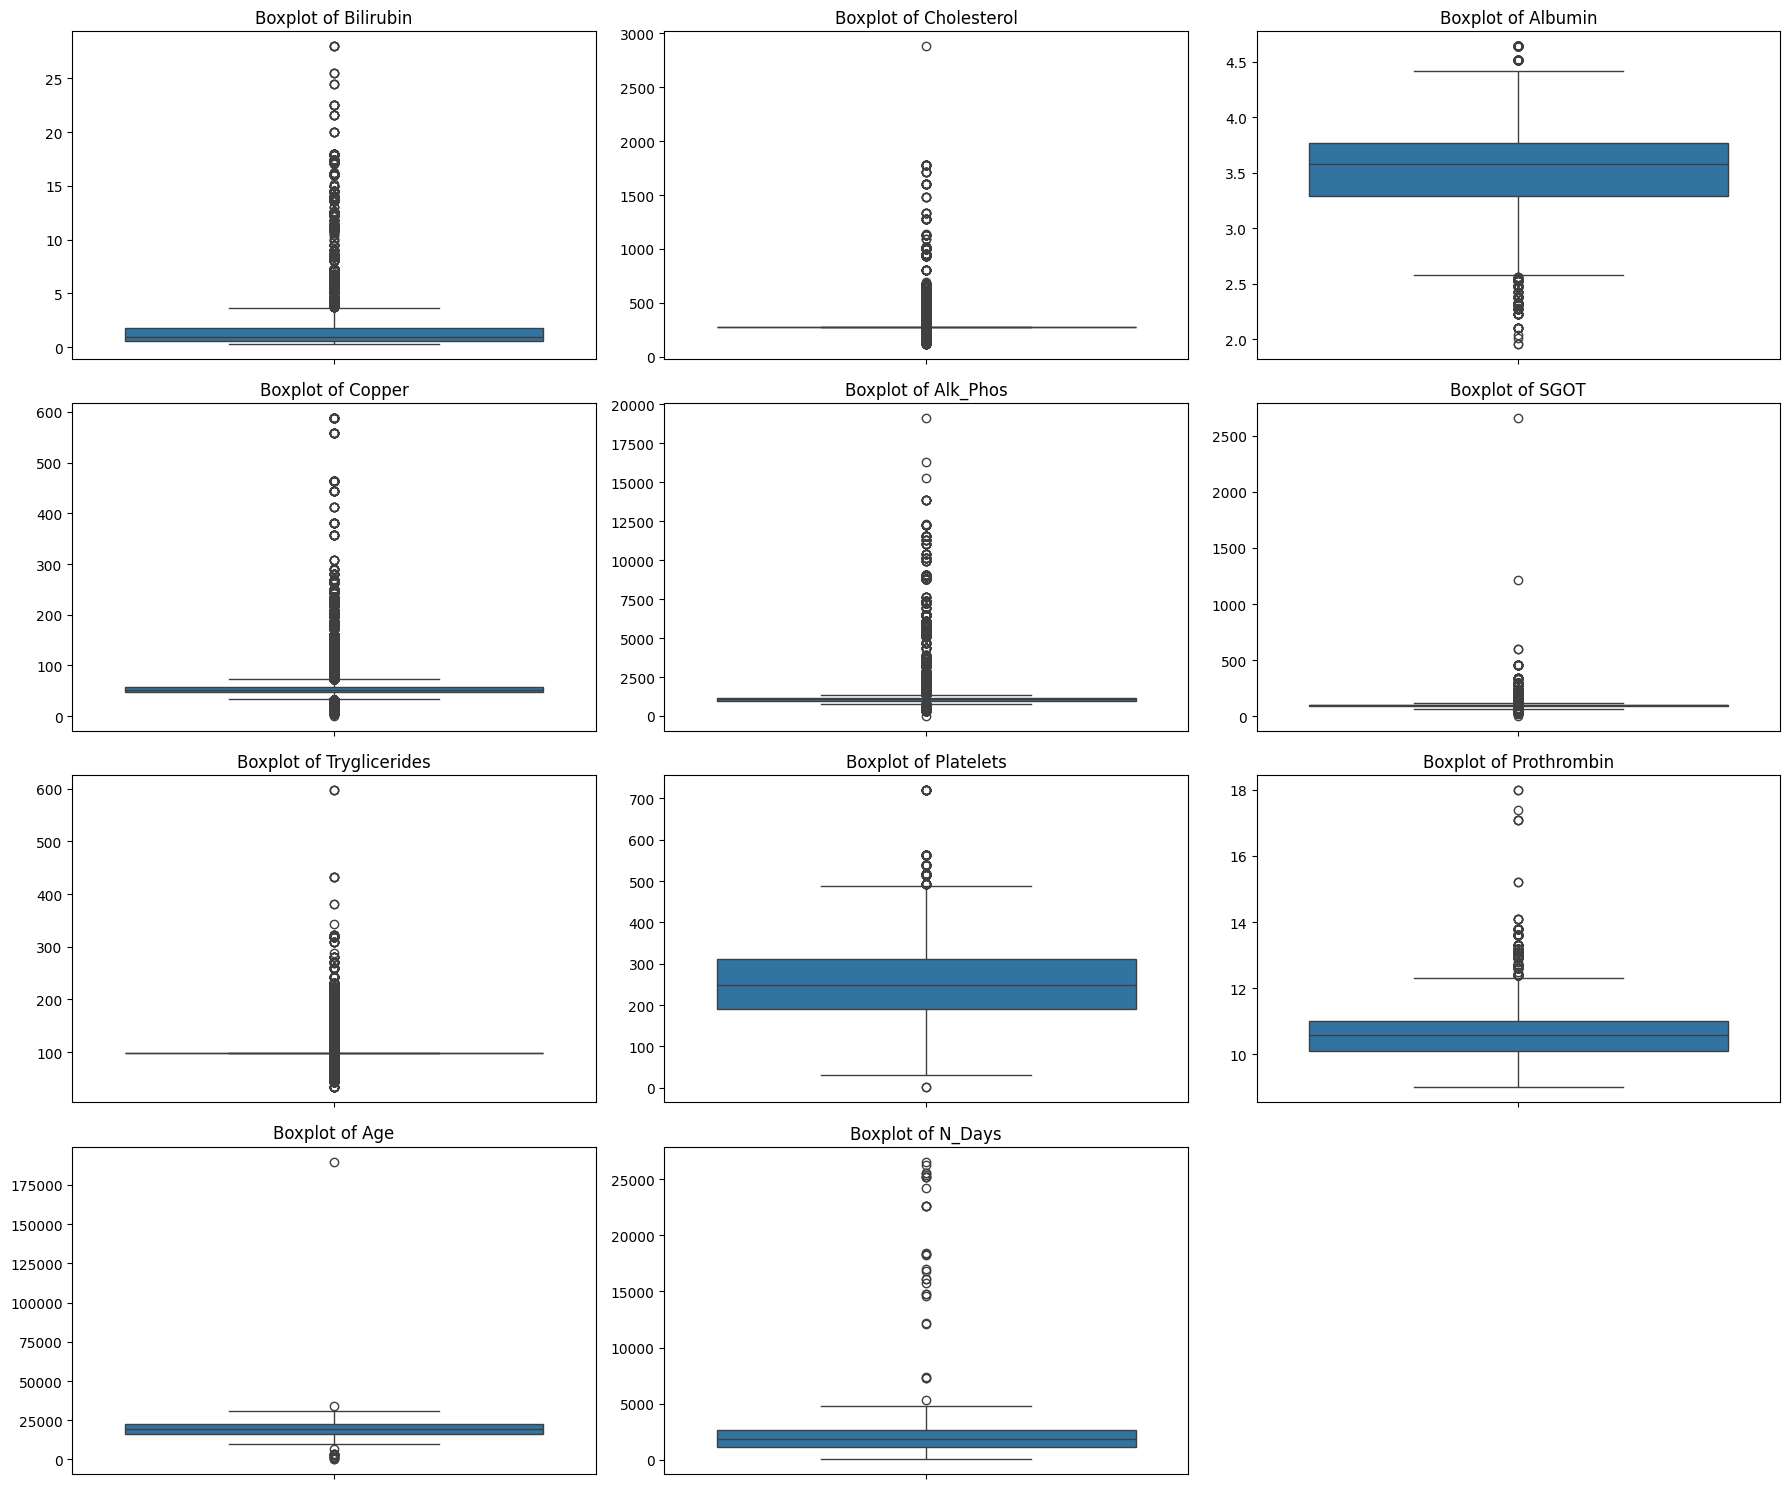

In [17]:
numerical_cols_for_boxplot = [
    'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Prothrombin', 'Age', 'N_Days'
]

plt.figure(figsize=(18, 15))
for i, col in enumerate(numerical_cols_for_boxplot):
    plt.subplot(4, 3, i + 1) # Arrange plots in a 4x3 grid
    sns.boxplot(y=df_train[col])
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
plt.tight_layout()
plt.show()

These boxplots visualize the distribution of each numerical feature and highlight potential outliers. Outliers are typically shown as individual points extending beyond the 'whiskers' of the boxplot. The box represents the interquartile range (IQR), and the line inside the box is the median. Analyzing these plots will help in identifying extreme values that might need special handling.

TARGET VARIABLE DISTRIBUTION ANALYSIS

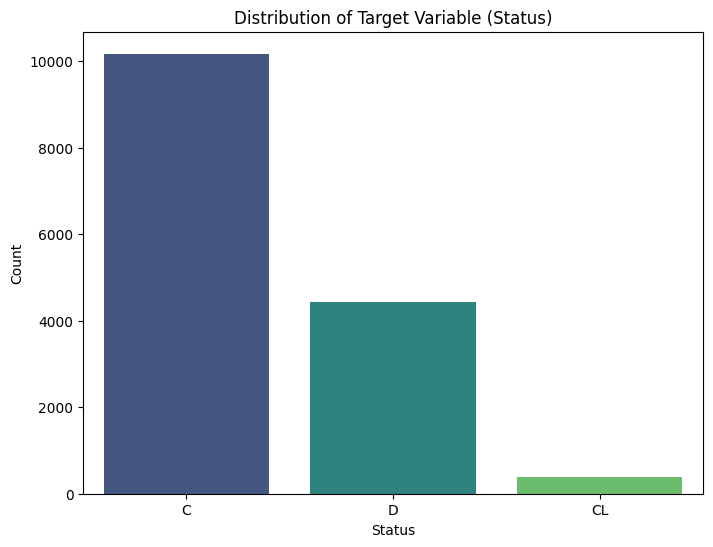

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Status', palette='viridis')
plt.title('Distribution of Target Variable (Status)')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

From here we will see that we have 3 status with C (censored)indicates the patient was alive at N_Days , CL indicates the patient was alive at N_Days due to liver a transplant, and D indicates the patient was deceased at N_Days.

In [19]:
numerical_features = [
    'N_Days', 'Age', 'Bilirubin', 'Albumin', 'Copper', 'Platelets',
    'Prothrombin', 'Stage'
]

log_transformed_features = [
    'Cholesterol_log', 'Tryglicerides_log', 'SGOT_log', 'Alk_Phos_log'
]

categorical_features = [
    'Drug', 'Sex', 'Edema'
]

binary_clinical_features = [
    'Spiders', 'Hepatomegaly', 'Ascites'
]

missing_indicator_features = [
    'Tryglicerides_missing', 'Cholesterol_missing', 'Copper_missing',
    'SGOT_missing', 'Alk_Phos_missing', 'Spiders_missing',
    'Hepatomegaly_missing', 'Ascites_missing'
]

target_variable = 'Status'

all_numerical_features = numerical_features + log_transformed_features + missing_indicator_features
all_categorical_features = categorical_features + binary_clinical_features

print("Numerical Features:", numerical_features)
print("Log Transformed Features:", log_transformed_features)
print("Categorical Features:", categorical_features)
print("Binary Clinical Features:", binary_clinical_features)
print("Missing Indicator Features:", missing_indicator_features)
print("Target Variable:", target_variable)
print("All Numerical Features:", all_numerical_features)
print("All Categorical Features:", all_categorical_features)

Numerical Features: ['N_Days', 'Age', 'Bilirubin', 'Albumin', 'Copper', 'Platelets', 'Prothrombin', 'Stage']
Log Transformed Features: ['Cholesterol_log', 'Tryglicerides_log', 'SGOT_log', 'Alk_Phos_log']
Categorical Features: ['Drug', 'Sex', 'Edema']
Binary Clinical Features: ['Spiders', 'Hepatomegaly', 'Ascites']
Missing Indicator Features: ['Tryglicerides_missing', 'Cholesterol_missing', 'Copper_missing', 'SGOT_missing', 'Alk_Phos_missing', 'Spiders_missing', 'Hepatomegaly_missing', 'Ascites_missing']
Target Variable: Status
All Numerical Features: ['N_Days', 'Age', 'Bilirubin', 'Albumin', 'Copper', 'Platelets', 'Prothrombin', 'Stage', 'Cholesterol_log', 'Tryglicerides_log', 'SGOT_log', 'Alk_Phos_log', 'Tryglicerides_missing', 'Cholesterol_missing', 'Copper_missing', 'SGOT_missing', 'Alk_Phos_missing', 'Spiders_missing', 'Hepatomegaly_missing', 'Ascites_missing']
All Categorical Features: ['Drug', 'Sex', 'Edema', 'Spiders', 'Hepatomegaly', 'Ascites']


### Univariate Analysis: Numerical Features (Histograms and KDE plots)

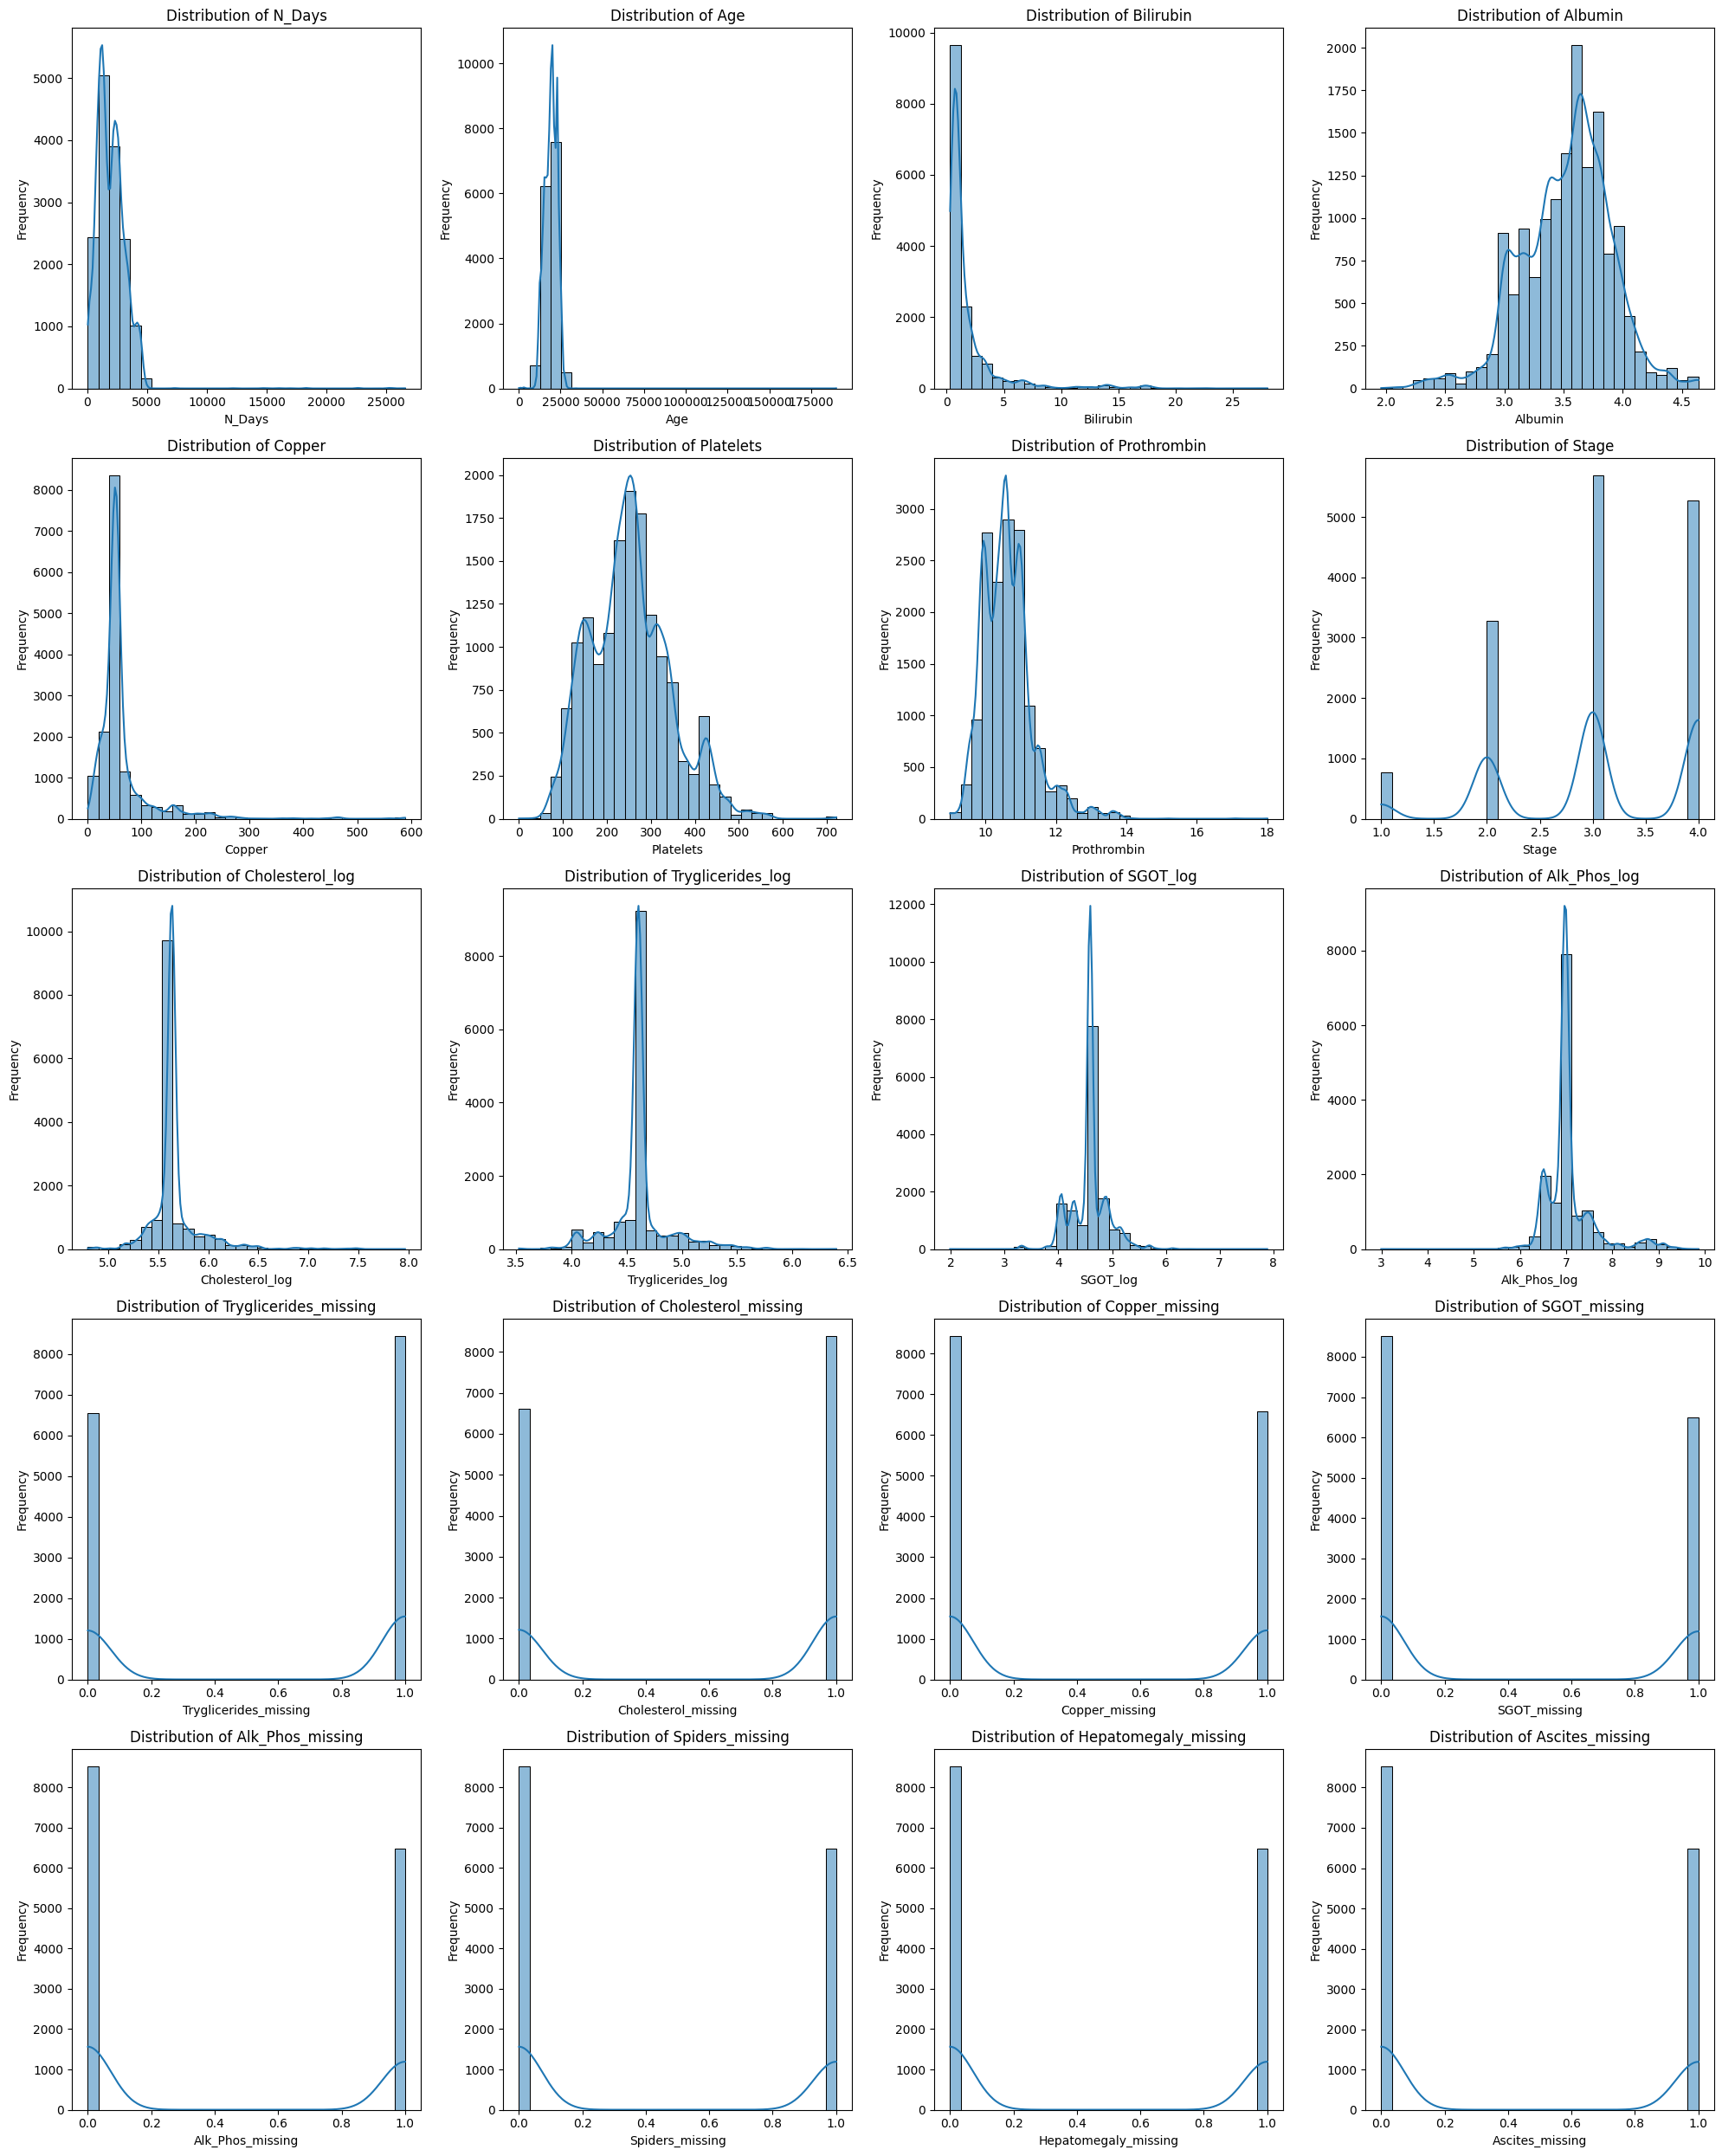

In [20]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(all_numerical_features):
    plt.subplot(5, 4, i + 1) # Adjust grid size as needed
    sns.histplot(df_train[col], kde=True, bins=30, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Univariate Analysis: Categorical Features

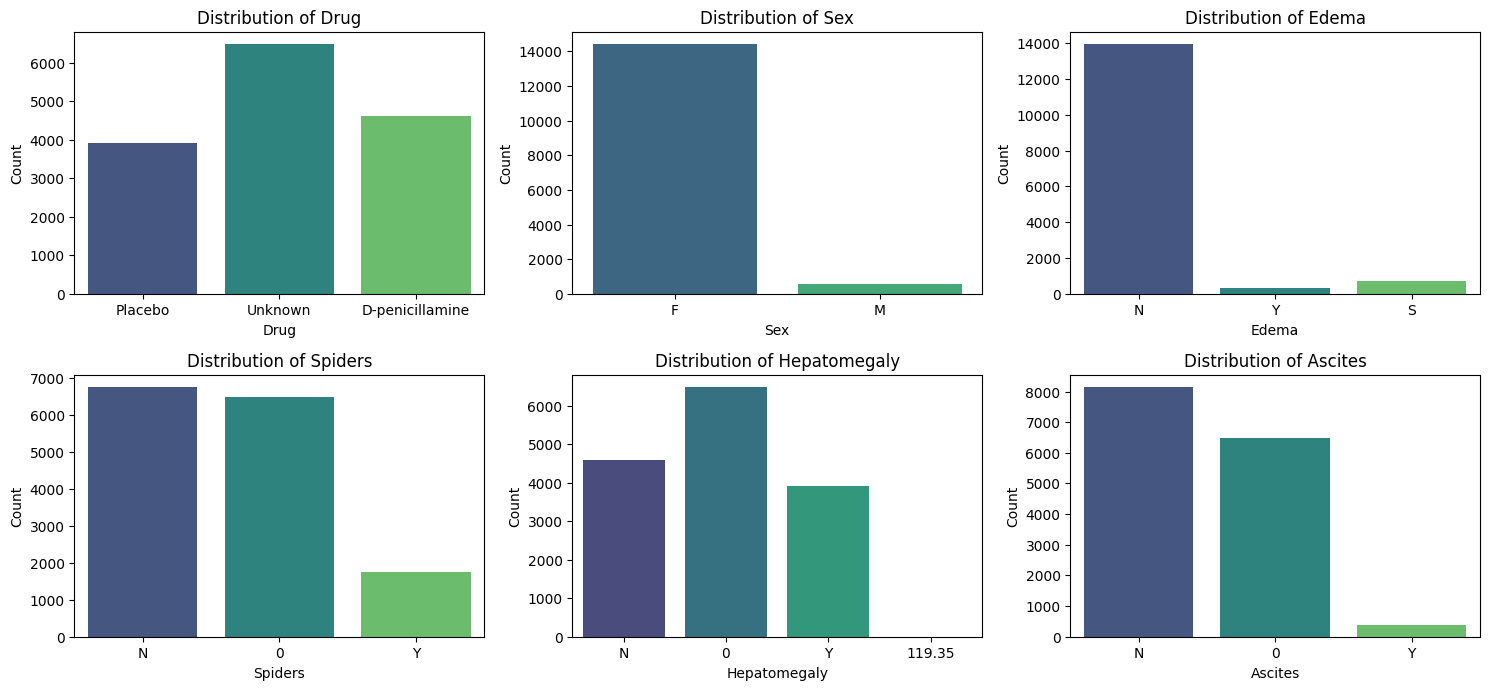

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(all_categorical_features):
    plt.subplot(3, 3, i + 1) # Adjust grid size as needed
    sns.countplot(data=df_train, x=col, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Heatmap Analysis

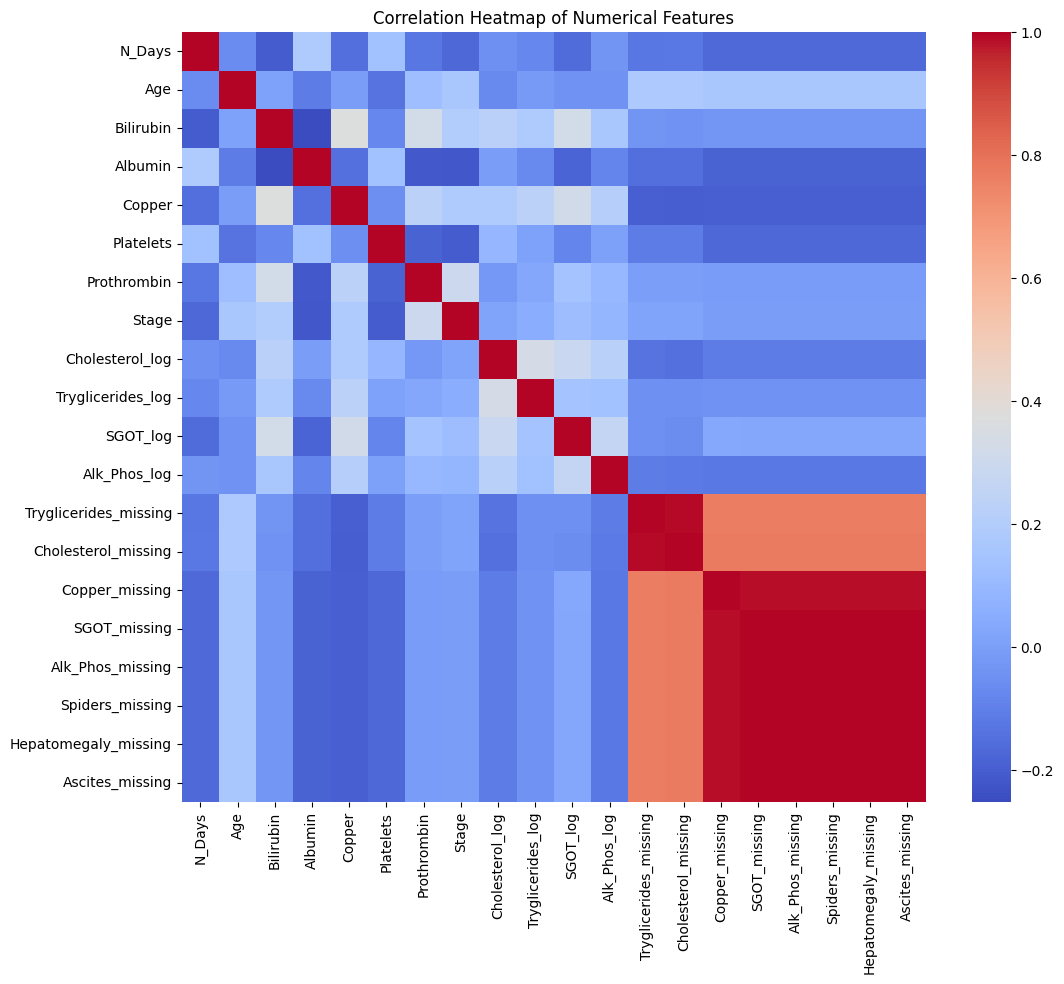

In [22]:
# correlation of all numerical columns
correlation_matrix = df_train[all_numerical_features].corr()

# plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Strong Positive Correlations:

Bilirubin shows strong positive correlations with SGOT_log (0.63) and Alk_Phos_log (0.57). This is expected, as these are all key indicators of liver function, and their levels often rise together in cases of liver dysfunction.
Bilirubin also has a notable positive correlation with Stage (0.51), suggesting that higher bilirubin levels are associated with more advanced stages of the disease.
Copper is positively correlated with SGOT_log (0.50), Alk_Phos_log (0.43), and Bilirubin (0.37), which can be clinically relevant in certain liver conditions.

Strong Negative Correlations:

Albumin has a significant negative correlation with Stage (-0.38) and Bilirubin (-0.25). This is also clinically consistent, as albumin levels tend to decrease with worsening liver function and disease progression, while bilirubin increases.
N_Days exhibits a negative correlation with Stage (-0.35). This might imply that patients with a higher disease stage (more severe) tend to have a shorter observed N_Days, or that the disease progression to higher stages occurs earlier in the observation period for some patients.

Weak/No Correlations:

 Most of the _missing indicator features show very weak correlations with other numerical variables, which is a good sign, as it suggests that the missingness mechanism itself is not strongly linearly dependent on the values of the observed features.

These correlations provide valuable insights into the interdependencies of the clinical and demographic features, which can be useful for feature selection and model building.



MODELING

In [23]:
x = df_train.drop(columns=['id', 'N_Days' ,'Status'])
y = df_train['Status']

In [24]:
df_test.drop(columns=['id', 'N_Days'])

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,...,Copper_missing,SGOT_missing,Alk_Phos_missing,Spiders_missing,Hepatomegaly_missing,Ascites_missing,Tryglicerides_log,Cholesterol_log,SGOT_log,Alk_Phos_log
0,D-penicillamine,20662.0,F,N,N,N,N,0.4,251.0,3.97,...,0,0,0,0,0,0,4.682131,5.529429,4.322807,6.665684
1,D-penicillamine,24257.0,M,N,Y,N,S,1.2,242.0,3.02,...,0,0,0,0,0,0,4.682131,5.493061,4.475062,6.867974
2,Unknown,24837.0,M,0,0,0,N,1.3,279.0,3.65,...,1,1,1,1,1,1,4.605170,5.634790,4.591578,6.976348
3,Placebo,12279.0,F,N,Y,Y,N,0.7,242.0,3.35,...,0,0,0,0,0,0,4.488636,5.493061,4.118224,6.484635
4,D-penicillamine,19722.0,F,N,N,Y,N,1.3,288.0,3.00,...,0,0,0,0,0,0,4.744932,5.666427,4.066459,8.892611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Unknown,22646.0,F,0,0,0,N,0.6,279.0,3.98,...,1,1,1,1,1,1,4.605170,5.634790,4.591578,6.976348
9996,Unknown,23376.0,F,0,0,0,N,2.1,279.0,3.15,...,1,1,1,1,1,1,4.605170,5.634790,4.591578,6.976348
9997,D-penicillamine,19318.0,F,N,Y,Y,N,0.7,279.0,3.87,...,0,0,0,0,0,0,4.605170,5.634790,4.066459,6.470800
9998,D-penicillamine,20296.0,F,N,N,N,S,0.6,279.0,3.60,...,0,0,0,0,0,0,4.605170,5.634790,4.681668,8.908668


In [25]:
# Data splitting
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models (Algorithms)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [26]:
# categorizing the data
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object', 'category']).columns

In [27]:
# scaling the numerical variable

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [28]:
# Encode for the categorical variable

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [31]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=2000,
        class_weight='balanced',
        random_state=42
    ))
])

In [32]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage',
       'Tryglicerides_missing', 'Cholesterol_missing', 'Copper_missing',
       'SGOT_missing', '...
       'Cholesterol_log', 'SGOT_log', 'Alk_Phos_log'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    multi_class='multinomial',
                                    random_state=42))])

In [33]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7133333333333334

Classification Report:
              precision    recall  f1-score   support

           C       0.90      0.73      0.81      2034
          CL       0.08      0.54      0.14        78
           D       0.74      0.68      0.71       888

    accuracy                           0.71      3000
   macro avg       0.57      0.65      0.55      3000
weighted avg       0.83      0.71      0.76      3000


Confusion Matrix:
[[1493  340  201]
 [  21   42   15]
 [ 144  139  605]]


In [35]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(
    y_test,
    y_proba,
    multi_class='ovr',
    average='weighted'
)

print("Multiclass ROC-AUC:", roc_auc)


Multiclass ROC-AUC: 0.8662345519592278


In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model,
    x,
    y,
    cv=cv,
    scoring='f1_weighted'
)

print("CV F1-weighted:", cv_scores.mean())


CV F1-weighted: 0.7573049749681291


RANDOM FOREST

In [37]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           C       0.88      0.90      0.89      2034
          CL       0.32      0.15      0.21        78
           D       0.77      0.75      0.76       888

    accuracy                           0.84      3000
   macro avg       0.66      0.60      0.62      3000
weighted avg       0.83      0.84      0.83      3000


Confusion Matrix:
[[1840   17  177]
 [  47   12   19]
 [ 211    9  668]]


In [39]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(
    y_test,
    y_proba,
    multi_class='ovr',
    average='weighted'
)

print("Multiclass ROC-AUC:", roc_auc)


Multiclass ROC-AUC: 0.904562224030483


In [40]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    rf_model,
    x,
    y,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1
)

print("CV F1-weighted:", cv_scores.mean())


CV F1-weighted: 0.8306660092564371


In [41]:
rf_model.fit(X_train, y_train)

feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()
importances = rf_model.named_steps['classifier'].feature_importances_

import pandas as pd

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df.head(15))


                   feature  importance
1           num__Bilirubin    0.153422
9         num__Prothrombin    0.137154
0                 num__Age    0.133300
8           num__Platelets    0.099171
3             num__Albumin    0.066852
4              num__Copper    0.053106
10              num__Stage    0.048595
21           num__SGOT_log    0.037163
6                num__SGOT    0.035484
20    num__Cholesterol_log    0.030365
2         num__Cholesterol    0.029796
5            num__Alk_Phos    0.027519
22       num__Alk_Phos_log    0.026528
7       num__Tryglicerides    0.021077
19  num__Tryglicerides_log    0.020629


CATBOOST

In [42]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [46]:
categorical_columns = [
    'Sex',
    'Drug',
    'Ascites',
    'Hepatomegaly',
    'Spiders',
    'Edema'
]


In [48]:
cat_features_idx = [
    X_train.columns.get_loc(col)
    for col in categorical_columns
    if col in X_train.columns
]


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [65]:


from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    loss_function='MultiClass',
    eval_metric='TotalF1',   # this is Macro-F1 in CatBoost terms
    iterations=2000,
    learning_rate=0.03,
    depth=8,
    random_seed=42,
    auto_class_weights='Balanced',
    l2_leaf_reg=5,
    subsample=0.8,
    bootstrap_type='Bernoulli',
    use_best_model=True,
    early_stopping_rounds=50,
    verbose=100,
    cat_features=cat_features_idx
)


In [66]:
cat_features_idx = [x.columns.get_loc(col) for col in all_categorical_features]

cat_model.fit(
    x,
    y,
    cat_features=cat_features_idx,
    eval_set=(X_test, y_test),
    use_best_model=True
)

0:	learn: 0.6760502	test: 0.6614908	best: 0.6614908 (0)	total: 401ms	remaining: 13m 20s
100:	learn: 0.7570413	test: 0.7265722	best: 0.7266421 (97)	total: 16.8s	remaining: 5m 16s
200:	learn: 0.7797048	test: 0.7538992	best: 0.7538992 (197)	total: 29s	remaining: 4m 19s
300:	learn: 0.7940581	test: 0.7594123	best: 0.7594123 (300)	total: 40.5s	remaining: 3m 48s
400:	learn: 0.8182340	test: 0.7920854	best: 0.7920854 (400)	total: 53.5s	remaining: 3m 33s
500:	learn: 0.8445424	test: 0.8372756	best: 0.8372756 (499)	total: 1m 6s	remaining: 3m 18s
600:	learn: 0.8627513	test: 0.8557909	best: 0.8562935 (597)	total: 1m 19s	remaining: 3m 4s
700:	learn: 0.8797422	test: 0.8721751	best: 0.8721751 (695)	total: 1m 32s	remaining: 2m 51s
800:	learn: 0.8896368	test: 0.8835177	best: 0.8837968 (788)	total: 1m 46s	remaining: 2m 39s
900:	learn: 0.8961187	test: 0.8953045	best: 0.8953045 (900)	total: 2m 1s	remaining: 2m 28s
1000:	learn: 0.9025053	test: 0.9011349	best: 0.9011349 (1000)	total: 2m 19s	remaining: 2m 18s


In [67]:
y_pred = cat_model.predict(X_test)
y_pred = y_pred.flatten()  # CatBoost returns shape (n,1)

y_proba = cat_model.predict_proba(X_test)


In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8943333333333333

Classification Report:
              precision    recall  f1-score   support

           C       0.96      0.89      0.92      2034
          CL       0.54      1.00      0.70        78
           D       0.82      0.89      0.85       888

    accuracy                           0.89      3000
   macro avg       0.77      0.93      0.83      3000
weighted avg       0.91      0.89      0.90      3000


Confusion Matrix:
[[1817   49  168]
 [   0   78    0]
 [  83   17  788]]


In [69]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(
    y_test,
    y_proba,
    multi_class='ovr',
    average='weighted'
)

print("Multiclass ROC-AUC:", roc_auc)


Multiclass ROC-AUC: 0.9673039652877056


In [70]:
import pandas as pd

feature_importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': cat_model.get_feature_importance()
}).sort_values(by='importance', ascending=False)

print(feature_importance_df.head(15))

         feature  importance
7      Bilirubin   14.377119
1            Age   13.869529
15   Prothrombin   13.635618
14     Platelets   11.491340
9        Albumin    8.654645
16         Stage    5.239966
10        Copper    4.782283
4   Hepatomegaly    3.541207
5        Spiders    2.563694
0           Drug    2.536217
12          SGOT    2.328810
27      SGOT_log    2.279272
8    Cholesterol    1.857653
11      Alk_Phos    1.836772
28  Alk_Phos_log    1.613798


Catboost model showed better performance compare to other model. So catboost showed robust performance than other algorithm.

You can load the saved model back into memory like this:

In [84]:

class_names = ['C', 'CL', 'D']
cl_index = class_names.index('CL')


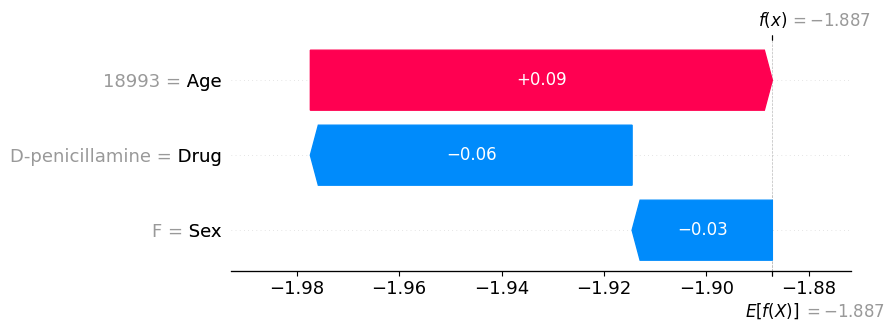

In [87]:
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[cl_index][0],
        base_values=explainer.expected_value[cl_index],
        data=X_test.iloc[0],
        feature_names=X_test.columns
    )
)


In [88]:
import joblib

# Define the filename for saving the model
model_filename = 'catboost_model.joblib'

# Save the trained CatBoost model
joblib.dump(cat_model, model_filename)

print(f"CatBoost model saved to {model_filename}")

CatBoost model saved to catboost_model.joblib


In [89]:
import joblib

# Define the filename where the model was saved
model_filename = 'catboost_model.joblib'

# Load the model from the file
loaded_model = joblib.load(model_filename)

print("Model loaded successfully!")

# You can now use the loaded_model for predictions
# For example:
# loaded_model.predict(X_new)
# loaded_model.predict_proba(X_new)

Model loaded successfully!
